# Section 2.8 — Probability models for random samples

This notebook contains the code examples from **Section 2.8 Probability models for random samples**
of the **No Bullshit Guide to Statistics**.



#### Notebook setup

In [1]:
# Ensure required Python modules are installed
%pip install --quiet numpy scipy seaborn ministats

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load Python modules
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from ministats import gen_samples
from ministats import plot_samples
from ministats import plot_samples_panel
from ministats import plot_sampling_dist
from ministats import plot_sampling_dists_panel

In [4]:
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={"font.family": "serif",
        "font.serif": ["Palatino", "DejaVu Serif", "serif"],
        "figure.figsize": (7,4)},
)
%config InlineBackend.figure_format = "retina"

<Figure size 640x480 with 0 Axes>

In [5]:
# simple float __repr__
import numpy as np
if int(np.__version__.split(".")[0]) >= 2:
    np.set_printoptions(legacy='1.25')

# set random seed for repeatability
np.random.seed(42)

## Definitions

- $X$: a random variable with probability distribution $f_X$
- $\mathbf{X} = (X_1,X_2,X_3, \ldots, X_n)$: *random sample* of size $n$.
  Each $X_i$ is independent copy of the random variable $X \sim f_X$.
- $\mathbf{x} = (x_1,x_2, \ldots, x_n)$: a *particular sample*,
    which consists of $n$ observations from the distribution $f_X$.
- **statistic**: any function computed from a particular sample $\mathbf{x}$.
- **sampling distribution of statistic**:
    the variability of a statistic when computed on a random sample $\mathbf{X}$

## Sample statistics

A statistics is any function we compute from a sample $\mathbf{x}$.

Examples of sample statistics:
- sample mean $\overline{\mathbf{x}} = \frac{1}{n}\sum_{i=1}^n x_i$
- sample variance $s^2 = \frac{1}{n-1}\sum_{i=1}^n \left(x_i-\overline{\mathbf{x}}\right)^2$
- median $F_{\mathbf{x}}^{-1}(\frac{1}{2})$, where $F_{\mathbf{x}}^{-1}$ is the inverse of the empirical CDF.
- 90th percentile $F_{\mathbf{x}}^{-1}(0.9)$


### Sample mean

Let's focus on the sample mean:

$$
  \overline{x} = \frac{1}{n}\sum_{i=1}^n x_i = \texttt{mean(} \mathbf{x} \texttt{)}
$$


In [6]:
def mean(sample):
    """
    Compute the mean of the values in `sample`.
    """
    return sum(sample) / len(sample)

In [7]:
mean([1, 3, 11])

5.0

### Example 1U: Samples from a uniform distribution


In [8]:
from scipy.stats import uniform
rvU = uniform(0,1)

In [9]:
np.random.seed(122)

In [10]:
mean(rvU.rvs(10))

0.4280460079337365

In [11]:
mean(rvU.rvs(100))

0.4756821051022538

In [12]:
mean(rvU.rvs(1000))

0.485479154547072

In [13]:
mean(rvU.rvs(10000))

0.5008027883588269

### Example 1Z: Samples from the standard normal


In [14]:
from scipy.stats import norm
rvZ = norm(0,1)

In [15]:
np.random.seed(123)

In [16]:
mean(rvZ.rvs(10))

-0.26951611032632805

In [17]:
mean(rvZ.rvs(100))

0.04528630589790069

In [18]:
mean(rvZ.rvs(1000))

-0.03750017240797483

In [19]:
mean(rvZ.rvs(100000))

0.0015932431337300676

### Example 1E: Samples from the exponential distribution


In [20]:
from scipy.stats import expon
lam = 0.2
rvE = expon(loc=0, scale=1/lam)

In [21]:
np.random.seed(127)

In [22]:
mean(rvE.rvs(10))

3.4770188924465337

In [23]:
mean(rvE.rvs(100))

4.850632215012492

In [24]:
mean(rvE.rvs(1000))

5.041138061882218

In [25]:
mean(rvE.rvs(100000))

5.00849380798984

### Law of large numbers

TODO: demo of some sort as sample size increases

maybe using all three examples...

## Sampling distribution of the mean

Consider the sample mean statistics,
which can be computed using the Python function `mean` above.
Given the random sample $\mathbf{X}$,
the quantity $\mathbf{Mean}(\mathbf{X})$ is a random variable. 
This should make sense intuitively,
since the inputs to the function $\mathbf{X}$ are random, the output of the function is also random.

The probability distribution of the random variable $\mathbf{Mean}(\mathbf{X})$
is called the **sampling distribution of the mean**.

### Example 2U: the sampling distribution $\mathbf{Mean}(\mathbf{U})$

In this example,
we'll study the sampling distribution of the $\mathbf{Mean}$ statistic
computed from samples of the form $\mathbf{U} = (U_1, U_2, \ldots, U_n)$,
where each $U_i$ is an instance of the standard uniform random variable $U \sim \mathcal{U}(0,1)$.

We can create a computer model `rvU` for the random variable $U \sim \mathcal{U}(0,1)$
by initializing an instance of the `uniform` family of distributions defined in `scipy.stats`.

In [26]:
from scipy.stats import uniform
rvU = uniform(0,1)

We can now generate observations of the random sample $\mathbf{U} = (U_1, U_2, \ldots, U_n)$
by calling the method `rvU.rvs(n)`,
which generates a sequence of `n` observations of the random variable $U$.

In [27]:
n = 30
usample = rvU.rvs(n)
usample.round(3)

array([0.311, 0.867, 0.216, 0.468, 0.519, 0.265, 0.035, 0.705, 0.937,
       0.76 , 0.806, 0.235, 0.454, 0.757, 0.352, 0.546, 0.465, 0.54 ,
       0.205, 0.535, 0.868, 0.95 , 0.083, 0.281, 0.121, 0.183, 0.857,
       0.505, 0.078, 0.25 ])

In [28]:
mean(usample)

0.471777206335568

We now generate some 10 data samples of size $n=30$,
and plot the observations as a scatter plot.

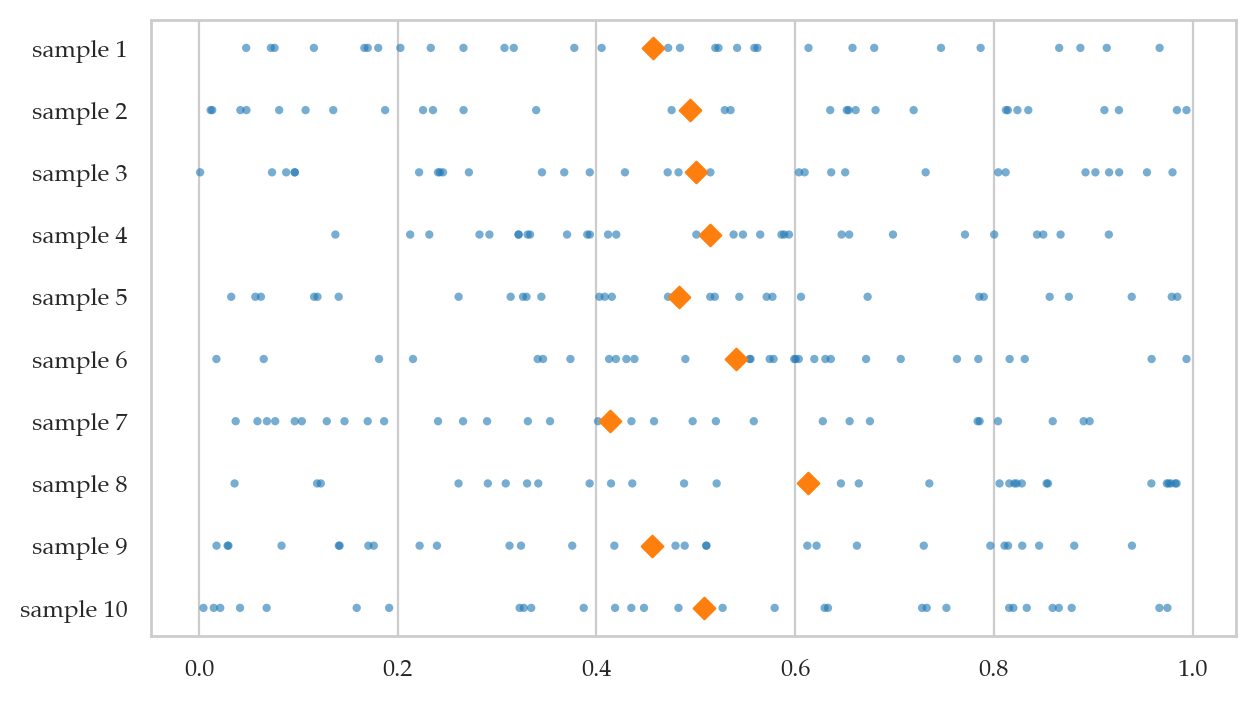

In [29]:
usamples_df = gen_samples(rvU, n=30, N=10)
plot_samples(usamples_df);

**Visualizing the sampling distribution of the mean.**  
Let's now generate $N=1000$ samples $\mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3, \ldots, \mathbf{u}_N$, compute the mean of each sample to form a list of observations `ubars` = $[\overline{\mathbf{u}_1}, \overline{\mathbf{u}_2}, \overline{\mathbf{u}_3}, \ldots, \overline{\mathbf{u}_N}]$.

In [30]:
N = 1000  # number of samples
n = 30    # sample size

ubars = []
for j in range(N):
    usample = rvU.rvs(n)
    ubar = mean(usample)
    ubars.append(ubar)

# TODO: rewrite using list-comprehension

In [31]:
N = 1000  # number of samples
n = 30    # sample size

usamples = [rvU.rvs(n) for j in range(N)]
ubars = [mean(usample) for usample in usamples]

In [32]:
ubars[0:5]

[0.5166580187797896,
 0.494019340353339,
 0.4952366746096193,
 0.5034161964218155,
 0.4939887221557366]

We can now plot a histogram of the observations from the sampling distribution we have `ubars`
by calling `sns.histplot(ubars)`.
We can also generate a strip plot using `sns.stripplot(ubars, marker="D")`,
specifying the `D` (diamond) marker to indicate we are plotting the means from each sample.

We'll use the function `sns.scatteplot(x=stats, y=-5, marker="D")` to draw a scatter plot below the histogram,
so you can see individual observations.

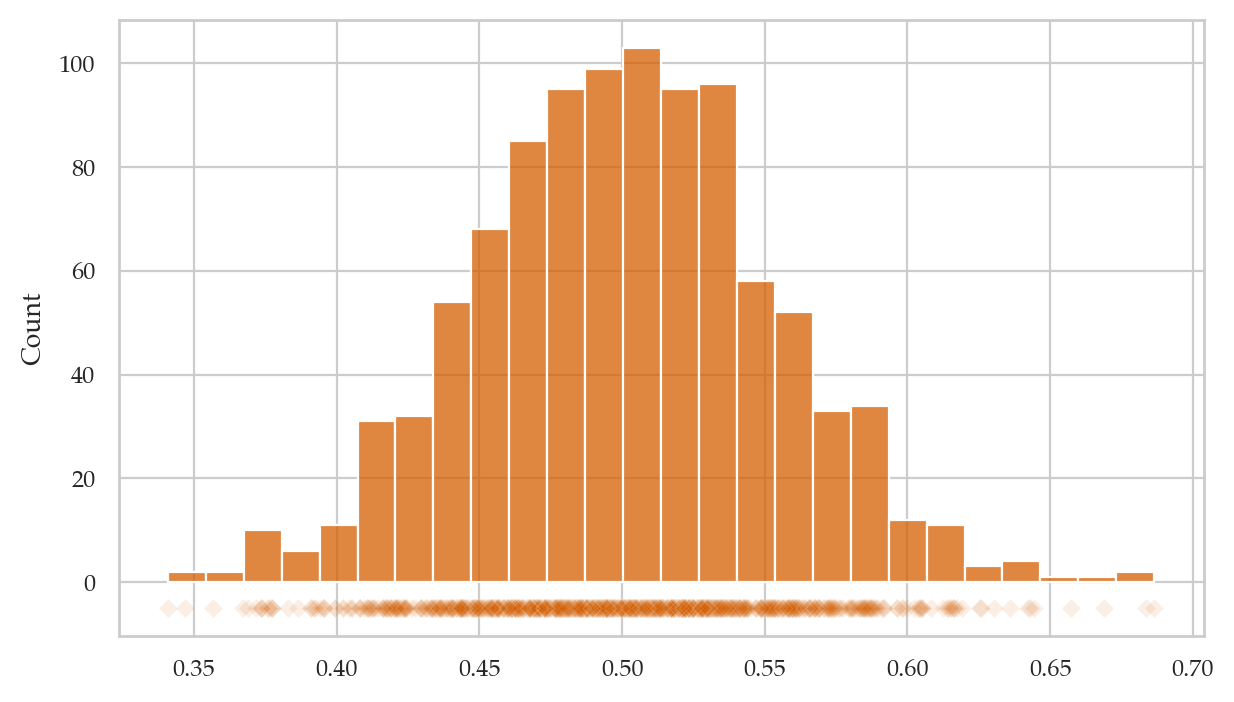

In [33]:
sns.histplot(ubars, color="r")
sns.scatterplot(x=ubars, y=-5, color="r", marker="D", alpha=0.1);

We can compute the mean and the variance of the sampling distribution:

In [34]:
np.mean(ubars), np.std(ubars)

(0.5009440637092808, 0.05207476878510105)

### General-purpose generator of sampling distributions

We can make generic function from the above example.

The function `gen_sampling_dist_of_mean` generates `N` samples of size `n` from the random variable object `rv`
and calculates the means of each of these samples.
The function returns a lists of means.

In [35]:
def gen_sampling_dist_of_mean(rvX, n, N=1000):
    """
    Generate the sampling distribution of the mean for samples of size `n`
    from the random variable `rvX` based on `N` simulated random samples.
    """
    xbars = []
    for j in range(N):
        xsample = rvX.rvs(n)
        xbar = np.mean(xsample)
        xbars.append(xbar)
    return xbars

In [36]:
np.random.seed(43)
ubars2 = gen_sampling_dist_of_mean(rvU, n=30, N=1000)

In [37]:
ubars2[0:5]

[0.4769002058840572,
 0.5793002328266957,
 0.45995858106973064,
 0.580177535702757,
 0.4101793585600197]

In [38]:
np.mean(ubars2), np.std(ubars2)

(0.5027831006852861, 0.053368150863753364)

### Example 2Z: the sampling distribution $\mathbf{Mean}(\mathbf{Z})$

Let's define a random variable `rvZ` $\sim \mathcal{N}(\mu=0, \sigma=1)$.

In [39]:
from scipy.stats import norm
rvZ = norm(0,1)

We now generate some 10 data samples of size $n=30$,
and plot the observations as a scatter plot.

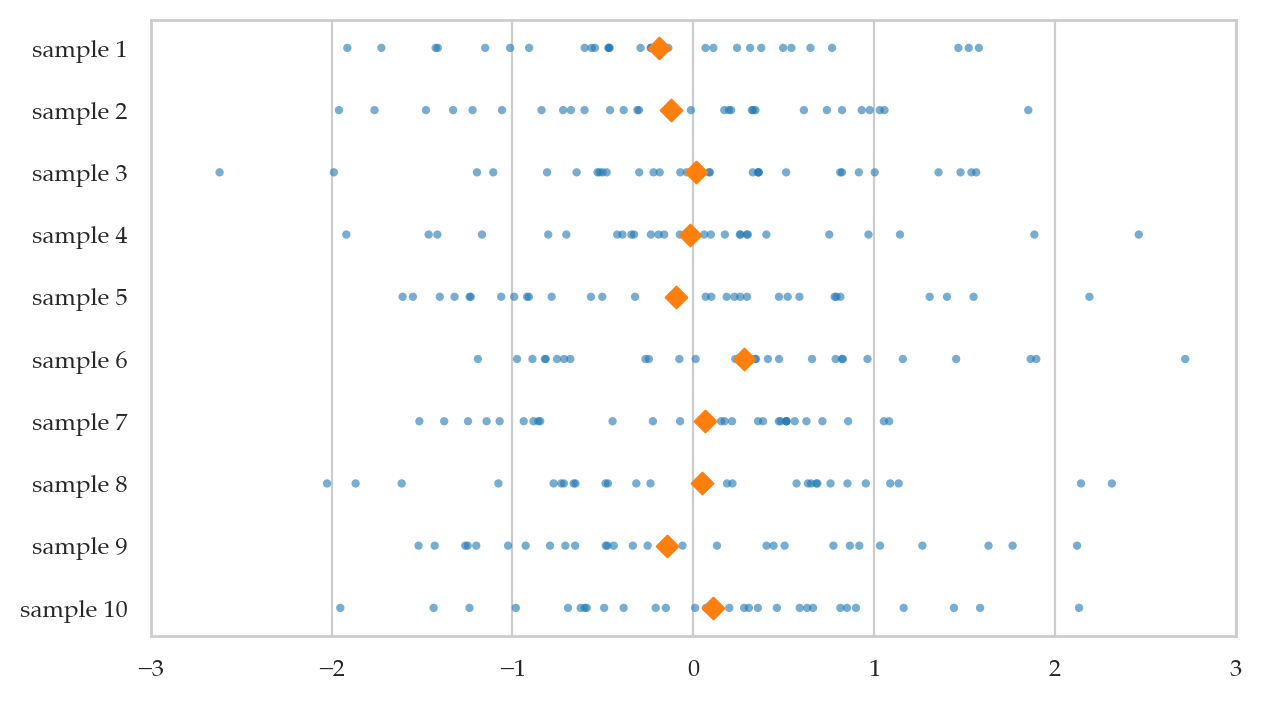

In [40]:
np.random.seed(42)
nsamples_df = gen_samples(rvZ, n=30, N=10)
plot_samples(nsamples_df, xlims=[-3,3]);

**Visualizing the sampling distribution of the mean.**  
Let's now generate $N=1000$ samples $\mathbf{z}_1, \mathbf{z}_2, \mathbf{z}_3, \ldots, \mathbf{z}_N$, compute the mean of each sample `zbars` = $[\overline{\mathbf{z}_1}, \overline{\mathbf{z}_2}, \overline{\mathbf{z}_3}, \ldots, \overline{\mathbf{z}_N}]$.

In [41]:
np.random.seed(46)
zbars = gen_sampling_dist_of_mean(rvZ, n=30, N=1000)
np.array(zbars[0:5]).round(3)

array([-0.019, -0.194, -0.028, -0.074,  0.127])

The plot helper function `plot_sampling_dist(stats)` generates a combined plot that
shows both a histogram and a scatter plot,
as shown in the figures below.

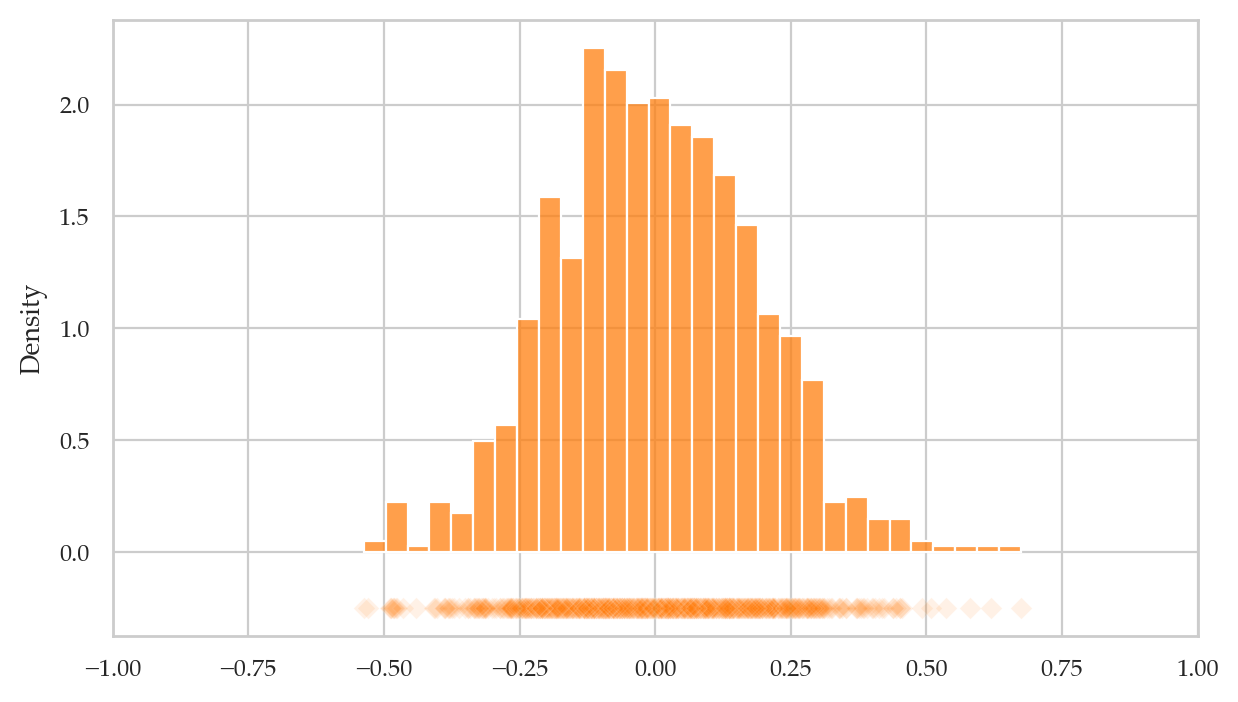

In [42]:
plot_sampling_dist(zbars, xlims=[-1,1]);

We can compute the mean and the variance of the sampling distribution:

In [43]:
np.mean(zbars), np.std(zbars)

(-0.0009476378449287116, 0.18378975146790222)

TODO: show math of Zoe's derivaiton

### Example 2E: the sampling distribution $\mathbf{Mean}(\mathbf{E})$

Let's define a random variable `rvE` $\sim \textrm{Expon}(\lambda=0.2)$.

In [44]:
from scipy.stats import expon
lam = 0.2      # lambda
scale = 1/lam
rvE = expon(0, scale)

We now generate some 10 data samples of size $n=30$,
and plot the observations as a scatter plot.

<Axes: >

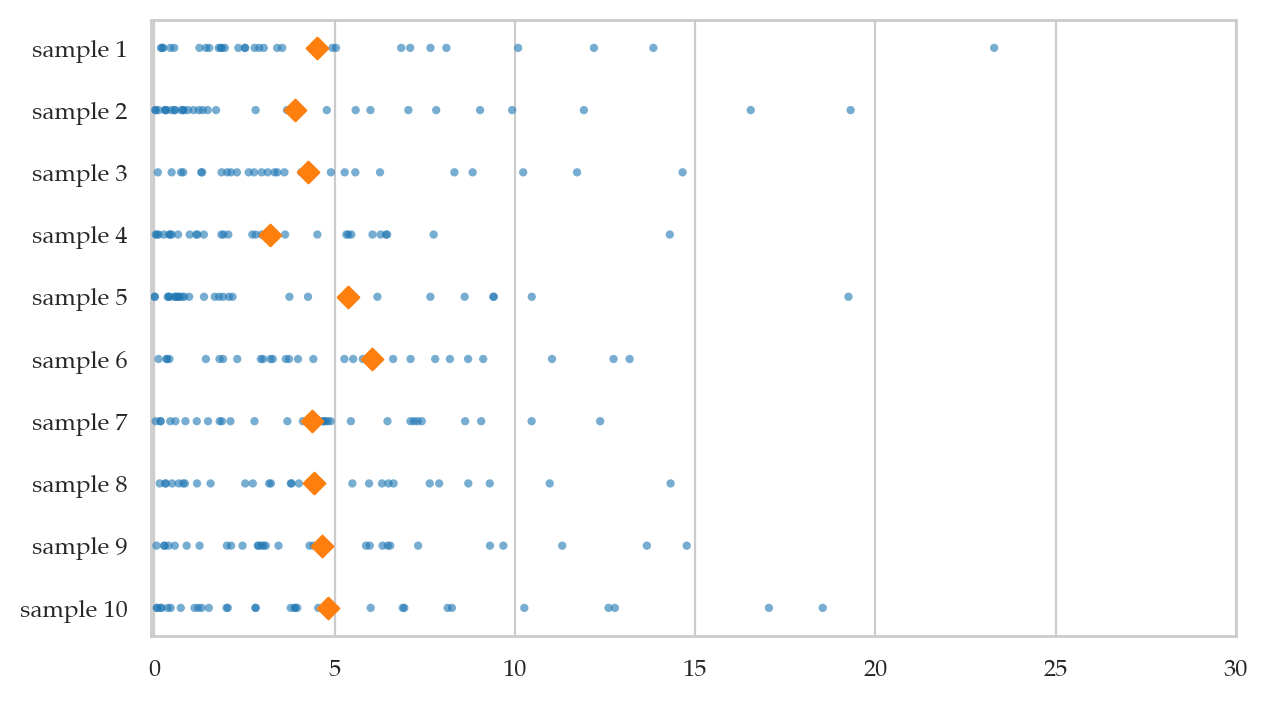

In [45]:
np.random.seed(46)
esamples_df = gen_samples(rvE, n=30, N=10)
plot_samples(esamples_df, xlims=[-0.1,30])

**Visualizing the sampling distribution of the mean.**  
We will now generate $N=1000$ samples $\mathbf{e}_1, \mathbf{e}_2, \mathbf{e}_3, \ldots, \mathbf{e}_N$, compute the mean of each sample $\overline{\mathbf{e}_1}, \overline{\mathbf{e}_2}, \overline{\mathbf{e}_3}, \ldots, \overline{\mathbf{e}_N}$.

In [46]:
np.random.seed(48)
ebars = gen_sampling_dist_of_mean(rvE, n=30, N=1000)
np.array(ebars[0:5]).round(3)

array([3.192, 5.005, 4.812, 4.367, 6.386])

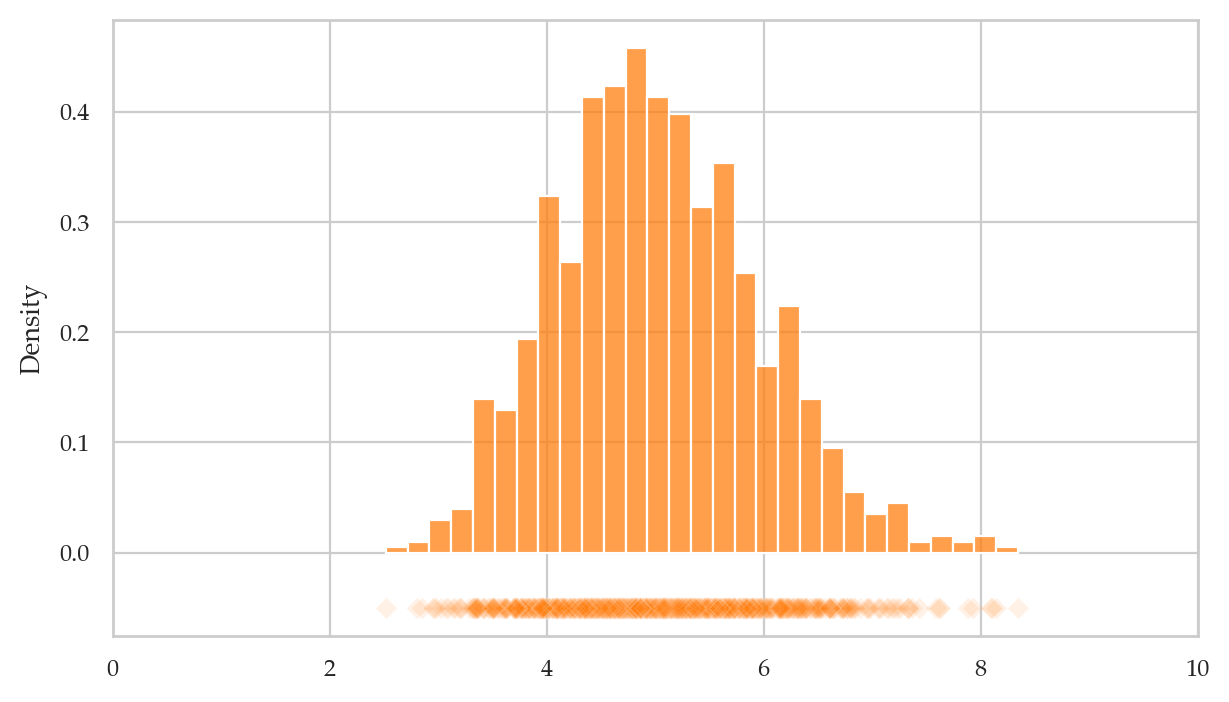

In [47]:
plot_sampling_dist(ebars, xlims=[0,10]);

We can compute the mean and the variance of the sampling distribution:

In [48]:
np.mean(ebars), np.std(ebars)

(5.025212594362794, 0.9297733370012011)

## Central limit theorem

The *Central Limit Theorem* (CLT) is a mathy result tells us two very important practical facts:

1. The sampling distribution of the sample mean $\overline{X}$ is normally distributed for samples taken for ANY random variable, as the sample size $n$ increases.

2. The standard deviation of sampling distribution of the sample mean $\overline{X}$
   decrease $\sigma_{\overline{X}} = \frac{\sigma}{\sqrt{n}}$,
   where $\sigma$ is the standard deviation of the random variable $X$.

Let's verify both claims of the CLT by revisiting the sampling distributions we obtained above.

### Example 3U: sampling distribution as a function of $n$

In [49]:
from scipy.stats import uniform

rvU = uniform(0,1)

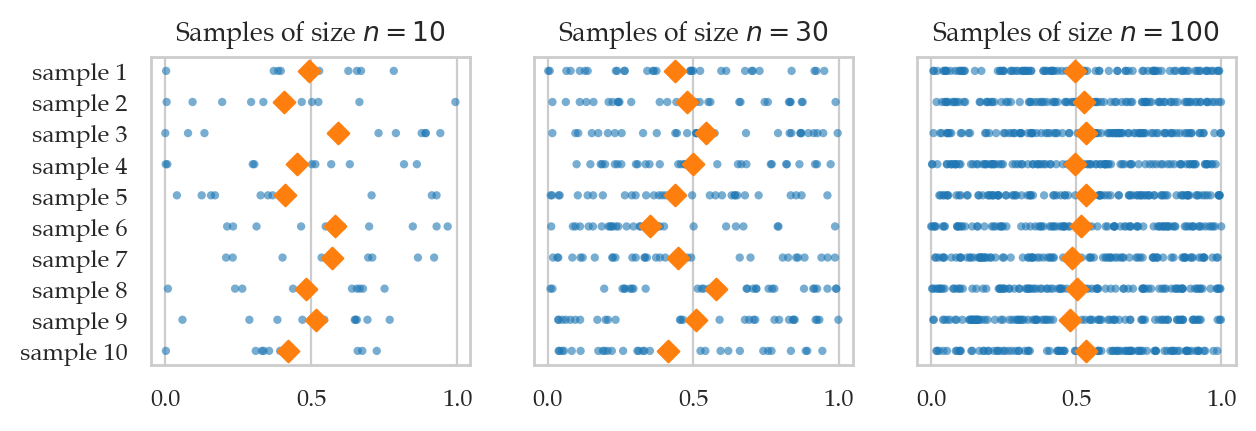

In [50]:
plot_samples_panel(rvU, xlims=None)

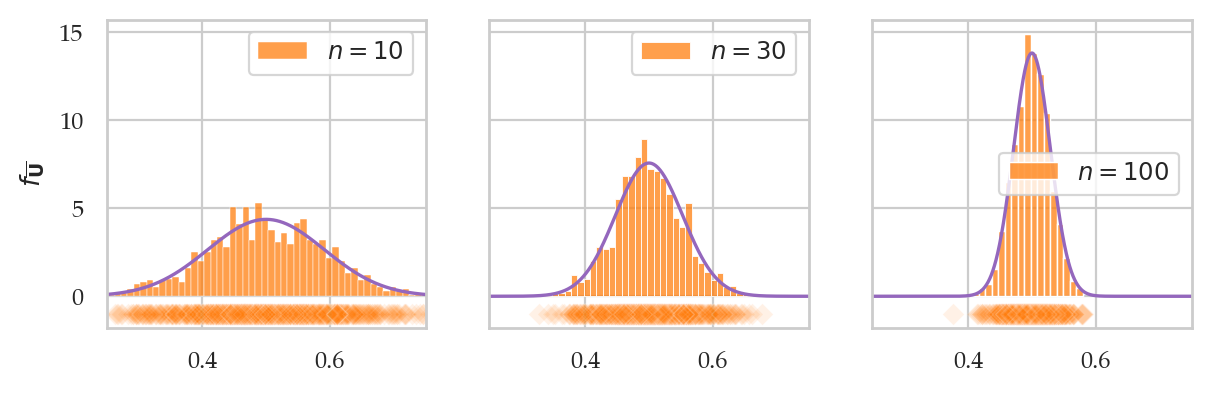

In [51]:
plot_sampling_dists_panel(rvU, rv_name="U", xlims=[0.25,0.75], binwidth=0.01);

Let's compare these observations from the simulation,
to the theoretical standard deviations predicted by the CLT.

In [52]:
np.random.seed(45)
N = 10000
ubars10 = [np.mean(rvU.rvs(10)) for j in range(N)]
np.std(ubars10), rvU.std()/np.sqrt(10)

(0.09097033522620938, 0.09128709291752768)

In [53]:
np.random.seed(47)
ubars30 = [np.mean(rvU.rvs(30)) for j in range(N)]
np.std(ubars30), rvU.std()/np.sqrt(30)

(0.052507004698028686, 0.05270462766947299)

In [54]:
np.random.seed(48)
ubars100 = [np.mean(rvU.rvs(100)) for j in range(N)]
np.std(ubars100), rvU.std()/np.sqrt(100)

(0.028881259542408586, 0.028867513459481287)

### Example 3Z: sampling distribution as a function of $n$

In [55]:
from scipy.stats import norm

mu = 0
sigma = 1
rvZ = norm(mu, sigma)

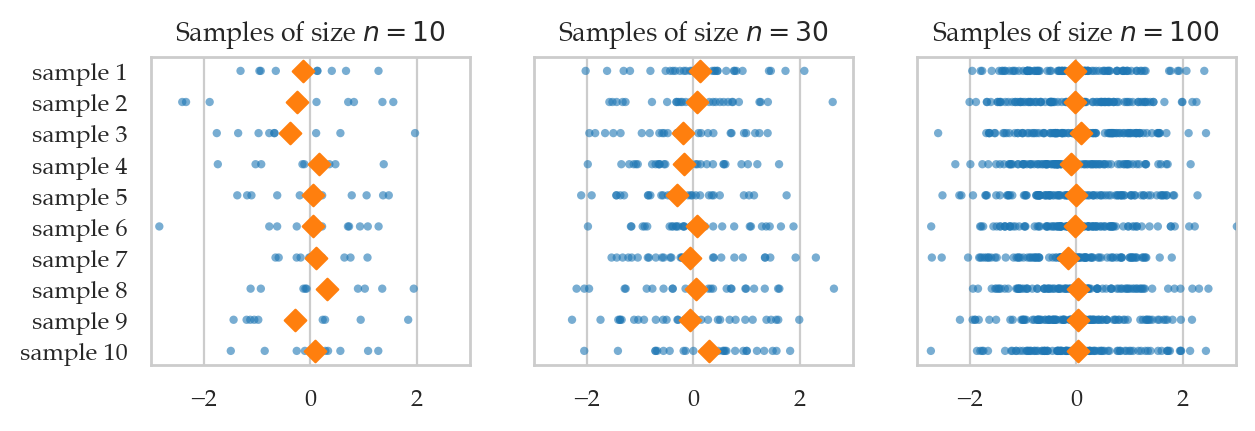

In [56]:
plot_samples_panel(rvZ, xlims=[-3, 3])

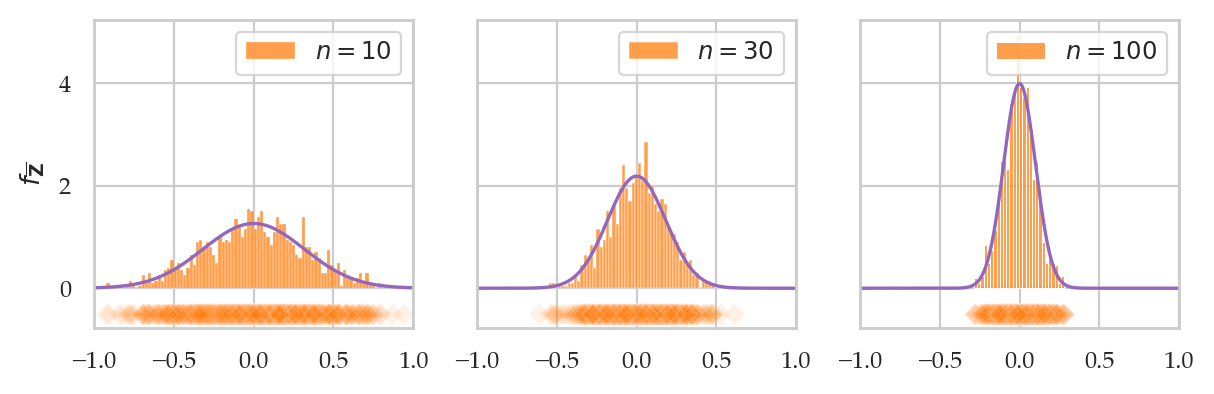

In [57]:
plot_sampling_dists_panel(rvZ, rv_name="Z", xlims=[-1, 1], binwidth=0.02);

Let's compare these observations from the simulation,
to the theoretical standard deviations predicted by the CLT.

In [58]:
np.random.seed(51)
zbars10 = [np.mean(rvZ.rvs(10)) for j in range(N)]
np.std(zbars10), rvZ.std()/np.sqrt(10)

(0.31531583269320146, 0.31622776601683794)

In [59]:
np.random.seed(52)
zbars30 = [np.mean(rvZ.rvs(30)) for j in range(N)]
np.std(zbars30), rvZ.std()/np.sqrt(30)

(0.18357450148601615, 0.18257418583505536)

In [60]:
np.random.seed(53)
zbars100 = [np.mean(rvZ.rvs(100)) for j in range(N)]
np.std(zbars100), rvZ.std()/np.sqrt(100)

(0.10022896783175735, 0.1)

### Example 3E: sampling distribution as a function of $n$

In [61]:
from scipy.stats import expon

lam = 0.2  # lambda
rvE = expon(0, scale=1/lam)

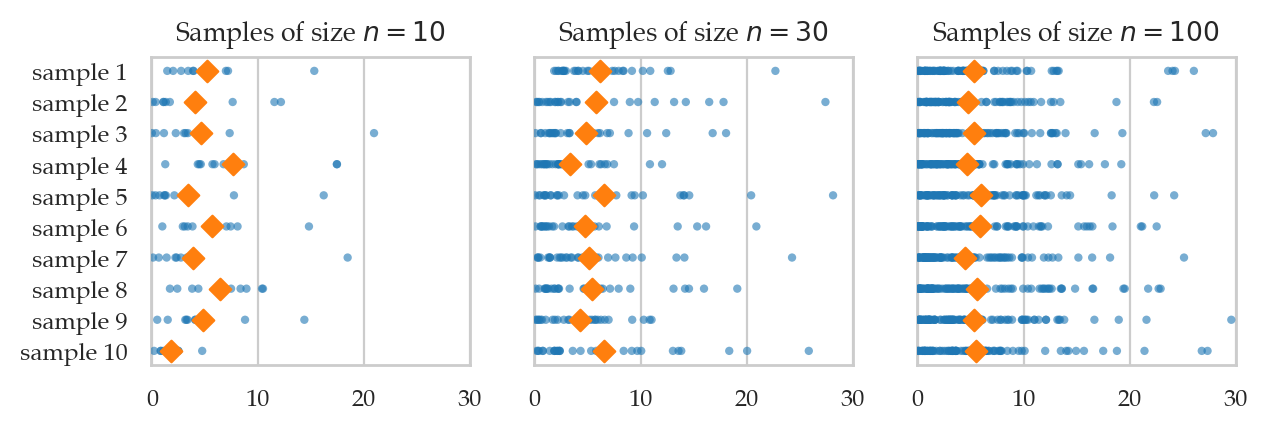

In [62]:
plot_samples_panel(rvE, xlims=[-0.1,30])

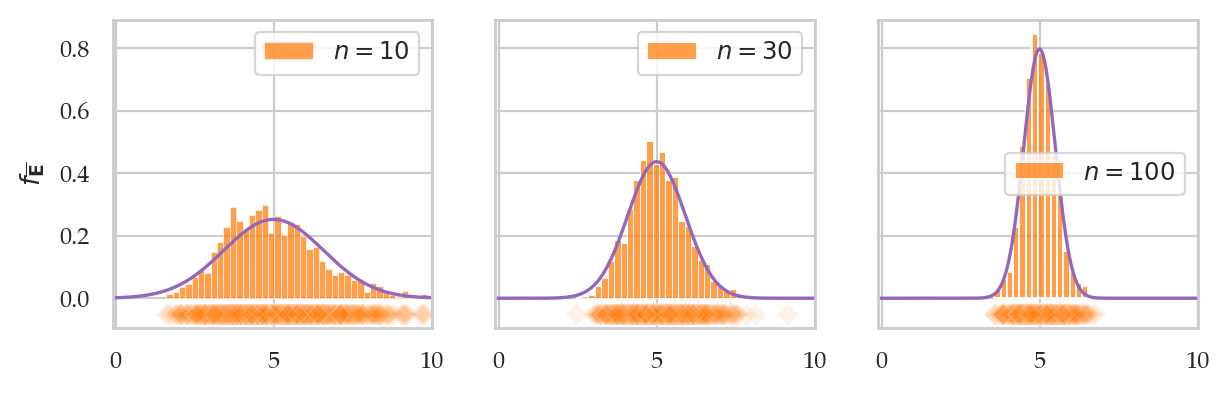

In [63]:
np.random.seed(60)
plot_sampling_dists_panel(rvE, rv_name="E", xlims=[-0.1, 10], binwidth=0.2);

In [64]:
np.random.seed(64)
ebars10 = [np.mean(rvE.rvs(10)) for j in range(N)]
np.std(ebars10), rvE.std()/np.sqrt(10)

(1.599726626168737, 1.5811388300841895)

In [65]:
np.random.seed(67)
ebars30 = [np.mean(rvE.rvs(30)) for j in range(N)]
np.std(ebars30), rvE.std()/np.sqrt(30)

(0.9078552687478914, 0.9128709291752769)

In [66]:
np.random.seed(68)
ebars100 = [np.mean(rvE.rvs(100)) for j in range(N)]
np.std(ebars100), rvE.std()/np.sqrt(100)

(0.50136020903652, 0.5)

## Discussion

### Sampling distributions of other statistics

In [67]:
def gen_sampling_dist(rvX, statfunc, n, N=1000):
    """
    Simulate `N` samples of size `n` from the random variable `rvX`
    to generate the sampling distribution of the statistic `statfunc`.
    """
    stats = []
    for j in range(N):
        xsample = rvX.rvs(n)
        stat = statfunc(xsample)
        stats.append(stat)
    return stats

In [68]:
np.random.seed(42)
ubars50 = gen_sampling_dist(rvU, statfunc=mean, n=50, N=10000)
np.mean(ubars50), np.std(ubars50)

(0.5002836237852907, 0.04103096896120843)

In [69]:
np.random.seed(42)
ubars50 = gen_sampling_dist_of_mean(rvU, n=50, N=10000)
np.mean(ubars50), np.std(ubars50)

(0.5002836237852907, 0.04103096896120843)

### CLT is the basis for all analytical approximations in statistics
CLT is the reason why statistics works. We can use properties of sample to estimate the parameters of the population, and our estimates get more and more accurate as the samples get larger.

## Exercises

See main text.